In [1]:
from photutils import CircularAperture, CircularAnnulus, SkyCircularAperture, SkyCircularAnnulus
from astropy import units as u
from astropy.coordinates import SkyCoord
import astropy.io.fits as fits
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from photutils import aperture_photometry, MMMBackground
import glob
from astropy.table import Table

In [2]:
test = fits.getdata('szkody/homer/f22.348.fits')

In [3]:
position = [736.5,923]
comparison = [824.4,919.4]
comparison2 = [1254,694]

In [4]:
aperture_test = CircularAperture(position, r = 9)
comparison_test = CircularAperture(comparison, r = 9)
comparison2_test = CircularAperture(comparison2, r = 12)

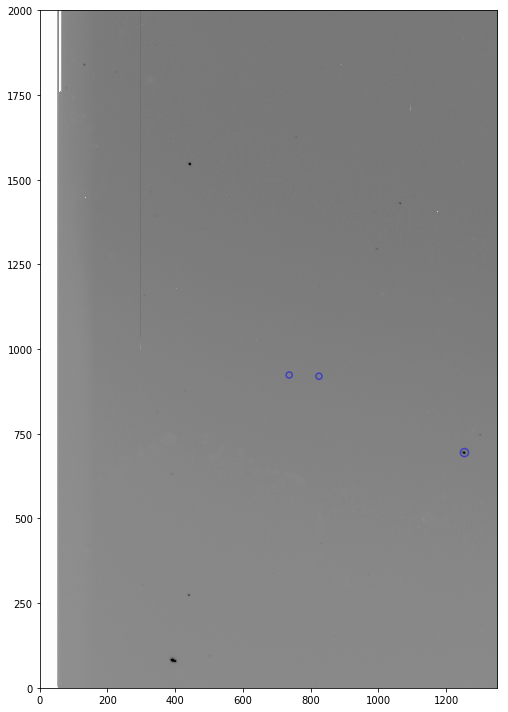

In [5]:
fig, ax = plt.subplots(1,1)

fig.set_size_inches(10,10)

fig.tight_layout()

ax.imshow(test, cmap = 'Greys', origin = 'lower', norm = LogNorm())
aperture_test.plot(color='blue', lw=1.5, alpha=0.5)
comparison_test.plot(color = 'blue', lw = 1.5, alpha = 0.5)
comparison2_test.plot(color = 'blue', lw = 1.5, alpha = 0.5)

In [6]:
test_data = aperture_photometry(test, aperture_test, method = 'center')
test_data['counts'] = test_data['aperture_sum'] / (np.pi * 9**2)
test_data

id,xcenter,ycenter,aperture_sum,counts
,pix,pix,,
int32,float64,float64,float64,float64
1,736.5,923.0,2641841.0,10381.779111428046


In [7]:
files_list = glob.glob('szkody/homer/f22*.fits')

In [8]:
len(files_list)
files_list.sort()
files_list

['szkody/homer\\f22.345.fits',
 'szkody/homer\\f22.346.fits',
 'szkody/homer\\f22.347.fits',
 'szkody/homer\\f22.348.fits',
 'szkody/homer\\f22.349.fits',
 'szkody/homer\\f22.350.fits',
 'szkody/homer\\f22.351.fits',
 'szkody/homer\\f22.352.fits',
 'szkody/homer\\f22.353.fits',
 'szkody/homer\\f22.354.fits',
 'szkody/homer\\f22.355.fits',
 'szkody/homer\\f22.356.fits',
 'szkody/homer\\f22.357.fits',
 'szkody/homer\\f22.358.fits',
 'szkody/homer\\f22.359.fits',
 'szkody/homer\\f22.360.fits',
 'szkody/homer\\f22.361.fits',
 'szkody/homer\\f22.362.fits',
 'szkody/homer\\f22.363.fits',
 'szkody/homer\\f22.364.fits',
 'szkody/homer\\f22.365.fits',
 'szkody/homer\\f22.366.fits',
 'szkody/homer\\f22.367.fits',
 'szkody/homer\\f22.368.fits',
 'szkody/homer\\f22.369.fits',
 'szkody/homer\\f22.370.fits',
 'szkody/homer\\f22.371.fits',
 'szkody/homer\\f22.372.fits',
 'szkody/homer\\f22.373.fits',
 'szkody/homer\\f22.374.fits',
 'szkody/homer\\f22.375.fits',
 'szkody/homer\\f22.376.fits',
 'szkody

In [9]:
files_data = []
for file in files_list:
    files_data.append(fits.getdata(file))

In [10]:
files_list[0]

'szkody/homer\\f22.345.fits'

In [11]:
gwlib_data = []
for i in files_data:
    gwlib_data.append(i)

In [12]:

flat = fits.getdata('szkody/homer/bgflat.fits')
flat2 = fits.getdata('szkody/homer/bgflat.fits')
bias = fits.getdata('szkody/homer/bias.fits')
f_m = flat2.mean()
print(f_m)

36038.324


In [13]:
for x in range(0, len(flat)):
    for y in range(0, len(flat[x])):
        flat[x][y] = flat[x][y] / f_m
print(flat.mean())
print(flat2.mean())
print(f_m)

0.99999946
36038.324
36038.324


In [14]:
#gwlib_data

In [15]:
#you keep forgetting the diggity dang overscan!!!!

#flat = fits.getdata('szkody/homer/bgflat.fits')
#bias = fits.getdata('szkody/homer/bias.fits')

for i in range(0,64):
    gwlib_data[i] = gwlib_data[i] - bias

for i in range(0,64):
    gwlib_data[i] = gwlib_data[i] / flat

In [16]:
gwlib_data[5]

array([[ -137.92518764,  -322.19633951,  -963.90905011, ...,
         5460.74299508,  5379.67328427,  -231.00830043],
       [   38.28732177,   -96.95444899,  -863.51212219, ...,
         5368.11617469,  5424.91385702, -1203.55206832],
       [ -423.75122292,   432.22087369,  -472.2717983 , ...,
         5535.92625017,  5401.97858312,  -403.61546361],
       ...,
       [   19.22665715,   -57.97029949,  -183.22968164, ...,
        11338.57024425, 13485.18126385,  -278.02435861],
       [ -115.38400127,  -431.19006088,  -106.08049965, ...,
        12849.00069909, 15355.55725181,  -500.39451855],
       [-1183.46397786,  -466.63812679,   -96.307748  , ...,
        14276.86707305, 11566.24913077,  -479.73774465]])

In [17]:
gwlib_apertures = Table(names = ('id','xcenter', 'ycenter', 'aperture_sum'))

for i in range(0,64):
    gwlib_apertures.add_row(aperture_photometry(gwlib_data[i], aperture_test, method = 'center')[0])

In [18]:
gwlib_apertures['counts per pixel'] = gwlib_apertures['aperture_sum'] / aperture_test.area()

In [19]:
comparison_apertures = Table(names = ('id','xcenter', 'ycenter', 'aperture_sum'))

for i in range(0,64):
    comparison_apertures.add_row(aperture_photometry(gwlib_data[i], comparison_test, method = 'center')[0])

comparison_apertures['counts per pixel'] = comparison_apertures['aperture_sum'] / comparison_test.area()

In [20]:
comparison2_apertures = Table(names = ('id','xcenter', 'ycenter', 'aperture_sum'))

for i in range(0,64):
    comparison2_apertures.add_row(aperture_photometry(gwlib_data[i], comparison2_test, method = 'center')[0])

comparison2_apertures['counts per pixel'] = comparison2_apertures['aperture_sum'] / comparison2_test.area()

In [21]:
annuli_test = CircularAnnulus(position, 15, 20)
comp_an_test = CircularAnnulus(comparison, 15, 20)
comp2_an_test = CircularAnnulus(comparison2, 17, 22)

gwlib_annuli = Table(names = ('id', 'xcenter', 'ycenter', 'aperture_sum'))
comparison_annuli = Table(names = ('id', 'xcenter', 'ycenter', 'aperture_sum'))
comparison2_annuli = Table(names = ('id', 'xcenter', 'ycenter', 'aperture_sum'))

for i in range(0,64):
    gwlib_annuli.add_row(aperture_photometry(gwlib_data[i], annuli_test, method = 'center')[0])
    comparison_annuli.add_row(aperture_photometry(gwlib_data[i], comp_an_test, method = 'center')[0])
    comparison2_annuli.add_row(aperture_photometry(gwlib_data[i], comp2_an_test, method = 'center')[0])

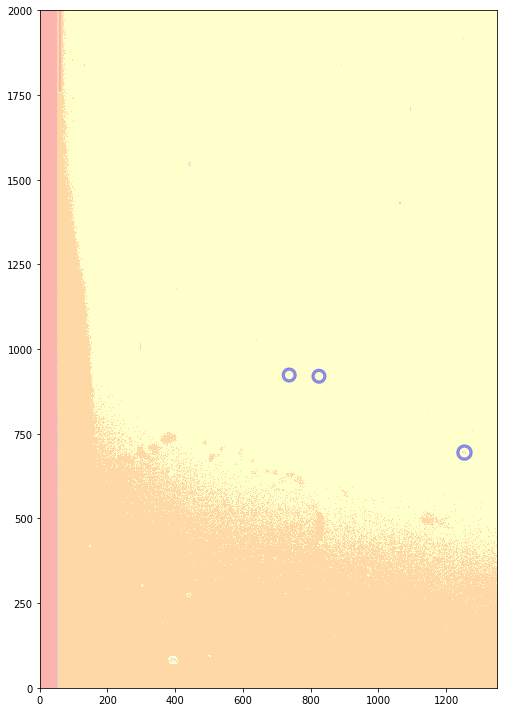

In [22]:
fig, ax = plt.subplots(1,1)

fig.set_size_inches(10,10)

fig.tight_layout()

ax.imshow(test, cmap = 'Pastel1', origin = 'lower', norm = LogNorm())
annuli_test.plot(color='blue', lw=1.5, alpha=0.5)
comp_an_test.plot(color = 'blue', lw = 1.5, alpha = 0.5)
comp2_an_test.plot(color = 'blue', lw = 1.5, alpha = 0.5)

In [23]:
gwlib_annuli['counts per pixel'] = gwlib_annuli['aperture_sum'] / annuli_test.area()
comparison_annuli['counts per pixel'] = comparison_annuli['aperture_sum'] / comp_an_test.area()
comparison2_annuli['counts per pixel'] = comparison2_annuli['aperture_sum'] / comp2_an_test.area()

In [24]:
gwlib_apertures['bkg subtracted'] = gwlib_apertures['counts per pixel'] - gwlib_annuli['counts per pixel']
comparison_apertures['bkg subtracted'] = comparison_apertures['counts per pixel'] - comparison_annuli['counts per pixel']
comparison2_apertures['bkg subtracted'] = comparison2_apertures['counts per pixel'] - comparison2_annuli['counts per pixel']

In [25]:
print(gwlib_annuli)
print(comparison_annuli)
print(comparison2_annuli)

 id xcenter ycenter    aperture_sum     counts per pixel
--- ------- ------- ------------------ -----------------
1.0   736.5   923.0  4827508.018405879 8780.820159372071
1.0   736.5   923.0  5043712.461349264 9174.077368662007
1.0   736.5   923.0  4438821.799575815 8073.833496074895
1.0   736.5   923.0  5357698.652586132 9745.191133209946
1.0   736.5   923.0  4938675.910995851 8983.024955015533
1.0   736.5   923.0  4407714.749939062 8017.252459335533
1.0   736.5   923.0  4420319.458148623 8040.179334967334
1.0   736.5   923.0  4201434.875617149 7642.047183236021
1.0   736.5   923.0  4253293.466751765 7736.373481760086
1.0   736.5   923.0  4110065.898090653 7475.854904166374
...     ...     ...                ...               ...
1.0   736.5   923.0  4127275.858602932 7507.158336005751
1.0   736.5   923.0  4016653.332464397 7305.945514837062
1.0   736.5   923.0 3968151.5996260755 7217.725051640018
1.0   736.5   923.0 4037391.0149726537 7343.665568316598
1.0   736.5   923.0  4143032.08

In [26]:
#fuck fuck fuck fuck fuck

print(gwlib_apertures)
print(comparison_apertures)
print(comparison2_apertures)

 id xcenter ycenter    aperture_sum     counts per pixel     bkg subtracted  
--- ------- ------- ------------------ ------------------ -------------------
1.0   736.5   923.0 2225944.4422657127  8747.408914432599  -33.41124493947245
1.0   736.5   923.0  2329335.877224256  9153.711579791026 -20.365788870980396
1.0   736.5   923.0  2063356.146575843  8108.477286088661   34.64379001376528
1.0   736.5   923.0  2440867.893119181   9592.00470677081   -153.186426439137
1.0   736.5   923.0  2299638.169226721   9037.00696185751  53.982006841977636
1.0   736.5   923.0 2082031.7600504812  8181.867809539582   164.6153502040488
1.0   736.5   923.0 2092936.7864960826  8224.721855548602  184.54252058126713
1.0   736.5   923.0  2002109.318847572 7867.7924618503375   225.7452786143167
1.0   736.5   923.0 2035885.5669500136  8000.524729618284   264.1512478581981
1.0   736.5   923.0 1981178.1021326275   7785.53797777352  309.68307360714607
...     ...     ...                ...                ...       

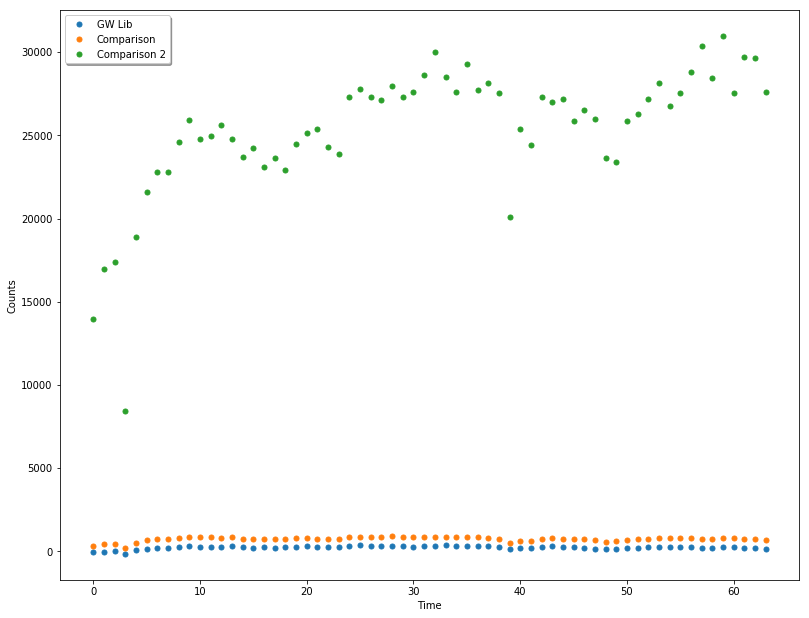

In [27]:
#this is a test plot
#need time from headers
#subtract background without weirdness

time_test = []
for i in range(0,64):
    time_test.append(i)

fig,ax = plt.subplots(1,1)
fig.set_size_inches(11,8.5)
fig.tight_layout()
ax.set_xlabel("Time")
ax.set_ylabel("Counts")


ax.plot(time_test, gwlib_apertures['bkg subtracted'], marker = 'o', linestyle = 'None', markersize = 5, label = 'GW Lib')
ax.plot(time_test, comparison_apertures['bkg subtracted'], marker = 'o', linestyle = 'None', markersize = 5, label = 'Comparison')
ax.plot(time_test, comparison2_apertures['bkg subtracted'], marker = 'o', linestyle = 'None', markersize = 5, label = 'Comparison 2')
ax.legend(loc=0,shadow=True);

In [28]:
gwlib_apertures['frac of comp'] = gwlib_apertures['bkg subtracted'] / comparison_apertures['bkg subtracted']
comparison_apertures['frac of comp2'] = comparison_apertures['bkg subtracted'] / comparison2_apertures['bkg subtracted']

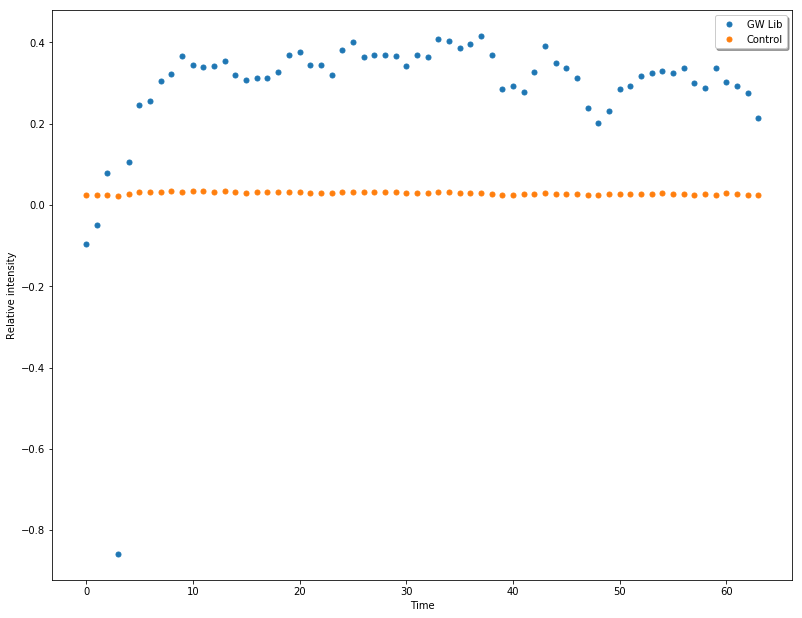

In [29]:
#this is a test plot
#need time from headers

fig,ax = plt.subplots(1,1)
fig.set_size_inches(11,8.5)
fig.tight_layout()
ax.set_xlabel("Time")
ax.set_ylabel("Relative intensity")


ax.plot(time_test, gwlib_apertures['frac of comp'], marker = 'o', linestyle = 'None', markersize = 5, label = 'GW Lib')
ax.plot(time_test, comparison_apertures['frac of comp2'], marker = 'o', linestyle = 'None', markersize = 5, label = 'Control')
ax.legend(loc=0,shadow=True);

In [30]:
from datetime import datetime, date
import time

In [31]:
time_list = []
init_time = 0
t= datetime.now()
for i in range(1, len(files_list)):
    header = fits.getheader(files_list[i])
    d = datetime.strptime(header['DATE-OBS'], '%Y-%m-%dT%H:%M:%S.%f')  # + t.microsecond / 1E6
    if i==1:
        init_time = d
    #out = time.mktime(d.timetuple()) + d.microsecond / 1E6
    #d = d.timetuple()
    time_list.append((d - init_time).total_seconds())
print(time_list)

[0.0, 81.0, 163.0, 244.0, 244.0, 407.0, 488.0, 569.0, 651.0, 732.0, 814.0, 895.0, 977.0, 1058.0, 1139.0, 1221.0, 1302.0, 1384.0, 1465.0, 1547.0, 1628.0, 1628.0, 1791.0, 1872.0, 1954.0, 2035.0, 2116.0, 2198.0, 2279.0, 2361.0, 2442.0, 2442.0, 2605.0, 2605.0, 2768.0, 2849.0, 2931.0, 3012.0, 3012.0, 3176.0, 3257.0, 3339.0, 3420.0, 3501.0, 3583.0, 3583.0, 3746.0, 3827.0, 3908.0, 3990.0, 4071.0, 4153.0, 4234.0, 4316.0, 4397.0, 4478.0, 4560.0, 4641.0, 4641.0, 4804.0, 4885.0, 4967.0, 5048.0, 5048.0]


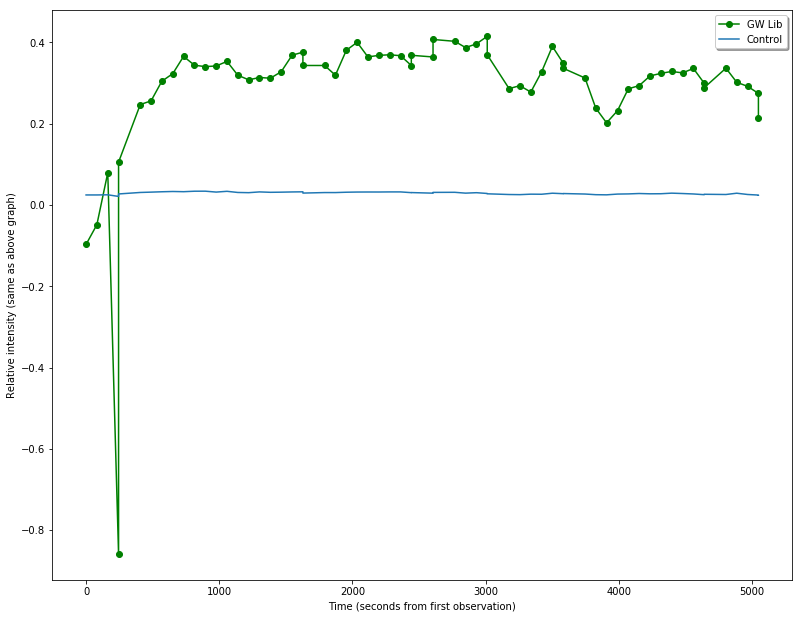

In [32]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(11,8.5)
fig.tight_layout()
ax.set_xlabel("Time (seconds from first observation)")
ax.set_ylabel("Relative intensity (same as above graph)")


ax.plot(time_list, gwlib_apertures['frac of comp'], "-g.", label = 'GW Lib', markersize=12, )
ax.plot(time_list, comparison_apertures['frac of comp2'], label = 'Control')
ax.legend(loc=0,shadow=True);

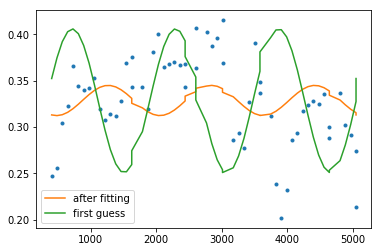

In [33]:
cut_dat = []
cut_tim = []
cut_amt = 5 #not the best way to do this
for i in range(cut_amt, len(time_list)):
    cut_dat.append(gwlib_apertures['frac of comp'][i])
    cut_tim.append(time_list[i])
from scipy.optimize import leastsq
N = len(cut_tim)
t = np.linspace(0, 6*np.pi, N)
tt = cut_tim
data = cut_dat

guess_mean = np.mean(data)
guess_std = 2.3*np.std(data)/(2**0.5)
guess_phase = .1*np.pi

data_first_guess = guess_std*np.sin(t+guess_phase) + guess_mean

optimize_func = lambda x: x[0]*np.sin(t+x[1]) + x[2] - data
est_std, est_phase, est_mean = leastsq(optimize_func, [guess_std, guess_phase, guess_mean])[0]

data_fit = est_std*np.sin(t+est_phase) + est_mean
fig.set_size_inches(11,8.5)

plt.plot(tt, data, '.')
plt.plot(tt, data_fit, label='after fitting')
plt.plot(tt, data_first_guess, label='first guess')
plt.legend()
plt.show()

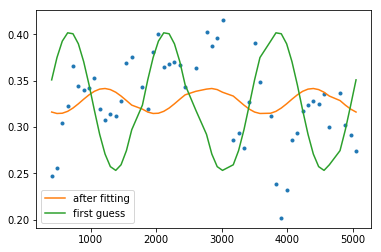

In [34]:
cut_dat = []
cut_tim = []
cut_amt = 5 #not the best way to do this
for i in range(cut_amt, len(time_list)):
    go = 1
    if time_list[i] in cut_tim:
        go = 0
    if go == 1:
        cut_dat.append(gwlib_apertures['frac of comp'][i])
        cut_tim.append(time_list[i])
from scipy.optimize import leastsq
N = len(cut_tim)
t = np.linspace(0, 6*np.pi, N)
tt = cut_tim
data = cut_dat

guess_mean = np.mean(data)
guess_std = 2.3*np.std(data)/(2**0.5)
guess_phase = .1*np.pi

data_first_guess = guess_std*np.sin(t+guess_phase) + guess_mean

optimize_func = lambda x: x[0]*np.sin(t+x[1]) + x[2] - data
est_std, est_phase, est_mean = leastsq(optimize_func, [guess_std, guess_phase, guess_mean])[0]

data_fit = est_std*np.sin(t+est_phase) + est_mean
fig.set_size_inches(11,8.5)

plt.plot(tt, data, '.')
plt.plot(tt, data_fit, label='after fitting')
plt.plot(tt, data_first_guess, label='first guess')
plt.legend()
plt.show()